# Genome track of Cebpd ChIP-seq

This notebook is for looking at genome tracks of the Cebpd ChIP-seq along side ATAC-seq and RNA-seq data.

In [2]:
from coolbox.api import *
from coolbox.utilities import refgene_txt_to_bed12
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
refgene_txt_to_bed12('data/bw_of_chipseq_of_interest/refGene.txt.gz', 'data/bw_of_chipseq_of_interest/refGene.bed')

First, load in the bigwig tracks for the various data. For different loci, the y-axis may need to be change via the max_chipseq, max_atac and max_rnaseq variables.

In [5]:
colors = sns.color_palette().as_hex()
max_chipseq = 12
max_atac = 4
max_rnaseq = 500
frame_cebpd_cop1ko = (BigWig('data/bw_of_chipseq_of_interest/cebpd/COP1_KO_sgRNA1.rep1_treat_pileup.bw', min_value=0, max_value=max_chipseq, name='Cebpd (Cop1 KO)') +  Title('Cebpd (Cop1 KO)'))
frame_cebpd_wt = (BigWig('data/bw_of_chipseq_of_interest/cebpd/WT2.rep1_treat_pileup.bw', min_value=0, max_value=max_chipseq, name='Cebpd (Cop1 WT)') +  Title('Cebpd (Cop1 WT)'))
frame_cebpd_rosa = (BigWig('data/bw_of_chipseq_of_interest/cebpd/ROSA.rep1_treat_pileup.bw', min_value=0, max_value=max_chipseq, name='Cebpd (Rosa26)') +  Title('Cebpd (Rosa26)'))
frame_h3k27ac = (BigWig('data/bw_of_chipseq_of_interest/cebpd/H3K27AC.rep1_treat_pileup.bw', min_value=0, name='H3K27AC') +  Title('H3K27AC'))
frame_h3k4me = (BigWig('data/bw_of_chipseq_of_interest/cebpd/H3K4me3.rep1_treat_pileup.bw', min_value=0, name='H3K4me3') +  Title('H3K4me3'))
frame_atac1 = (BigWig('data/bw_of_chipseq_of_interest/Cop1sg1_IFN_r1.rep1_treat_pileup.mm10.bw', min_value=0, max_value=max_atac) +  Title('Cop1 KO ATAC-seq'))
frame_atac2 = (BigWig('data/bw_of_chipseq_of_interest/Rosa26_IFN_r1.rep1_treat_pileup.mm10.bw', min_value=0, max_value=max_atac) +  Title('Rosa26 ATAC-seq'))
frame_rnaseq_cop1ko = (BigWig('data/rnaseq_bw/Cop1_sg2_r2.bw', min_value=0, max_value=max_rnaseq, name='RNA-seq (Cop1 KO)') +  Title('RNA-seq (Cop1 KO)'))
frame_rnaseq_rosa = (BigWig('data/rnaseq_bw/Rosa26_R1.bw', min_value=0, max_value=max_rnaseq, name='RNA-seq (Rosa26)') +  Title('RNA-seq (Rosa26)'))
frame_rnaseq_cebpdko = (BigWig('data/rnaseq_bw/4T1_CebpdKoSg1_IFNg_R1_Signal.Unique.str1.out.bw', min_value=0, max_value=max_rnaseq, name='RNA-seq (Cebpd KO)') +  Title('RNA-seq (Cebpd KO)'))

frame = XAxis() + (frame_cebpd_wt + Color(colors[0])) + (frame_cebpd_rosa + Color(colors[0])) + (frame_cebpd_cop1ko + Color(colors[1])) + (frame_atac2 + Color(colors[0])) + (frame_atac1 + Color(colors[1]))   + (frame_rnaseq_rosa + Color(colors[0])) + (frame_rnaseq_cop1ko + Color(colors[1]))  + Spacer(1) + Bed('data/bw_of_chipseq_of_interest/refGene.sorted2.bed', height=.75)

Visualize a locus. Change the chromosome, start and stop positions to view a different locus.

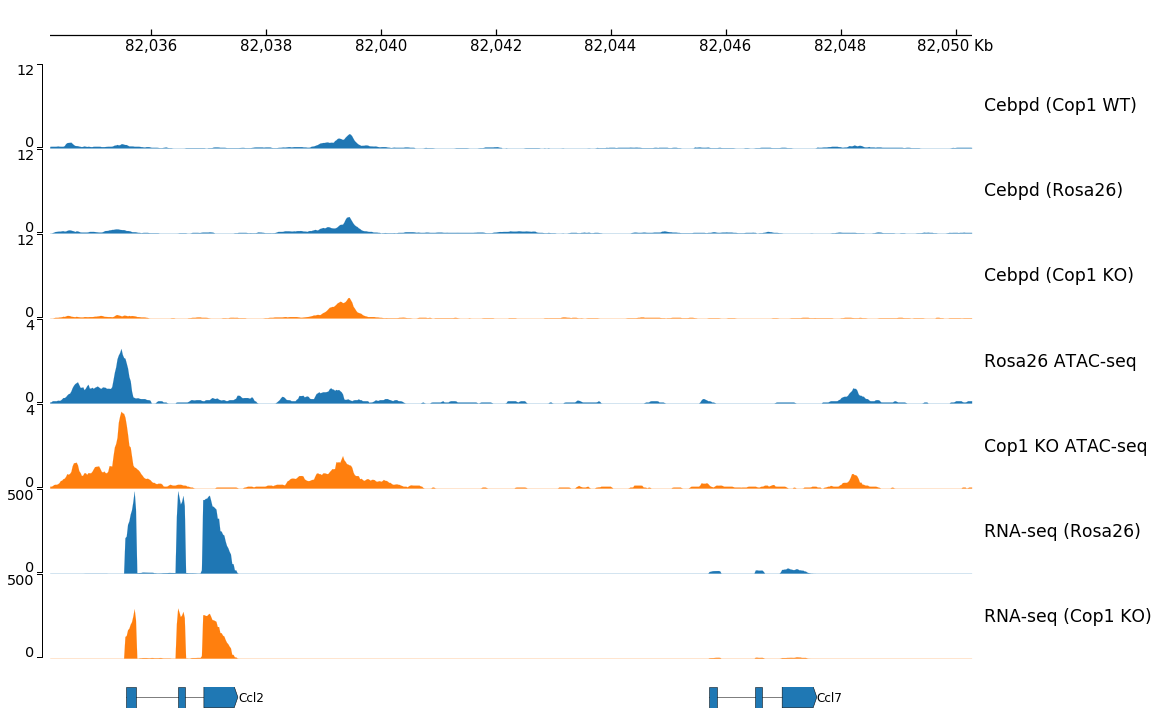

In [6]:
with sns.plotting_context('notebook', font_scale=1.2):
    fig = frame.plot('chr11', 82031744+2500, 82041279+9000)
    #fig.savefig('figures/ccl2_track_v4.pdf')
fig